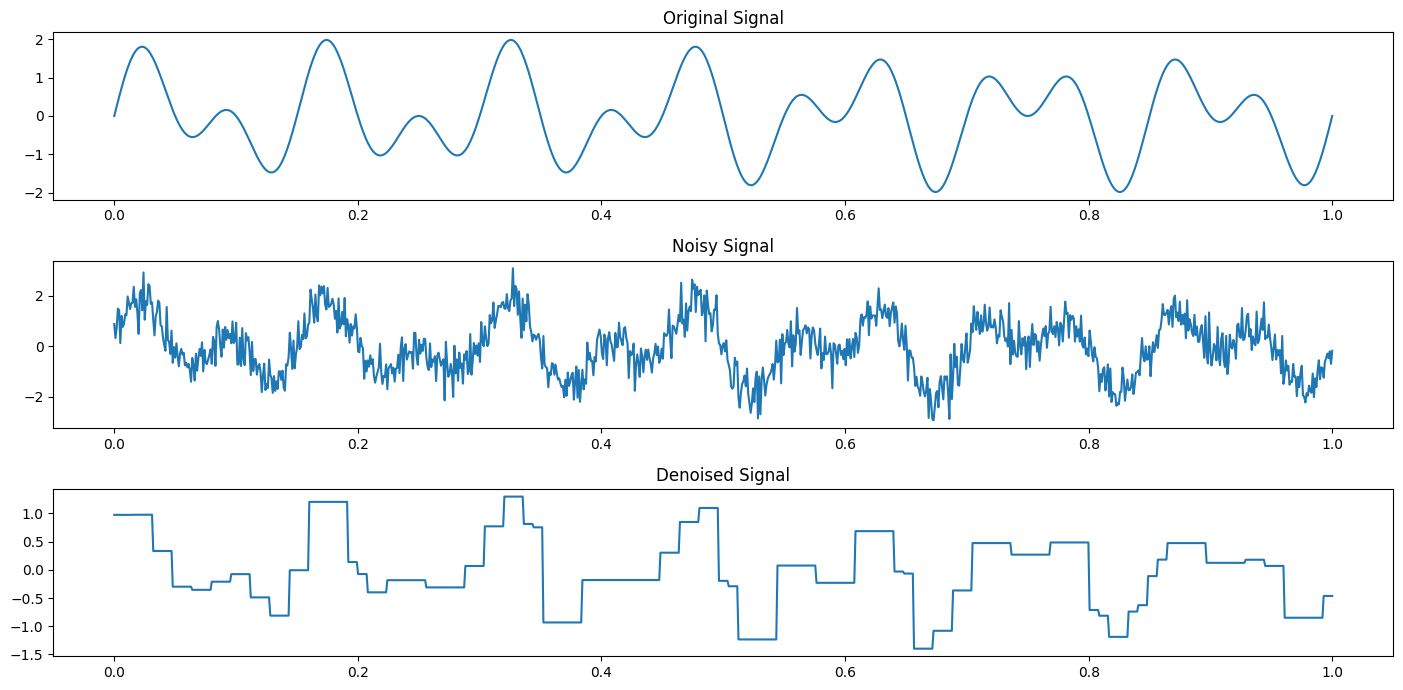

In [1]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

def soft_threshold(coeffs, threshold):
    """Apply soft-thresholding to the wavelet coefficients."""
    return np.sign(coeffs) * np.maximum(np.abs(coeffs) - threshold, 0)

def estimate_noise(coeffs):
    """Estimate the noise level (standard deviation) from the detail coefficients at the finest scale."""
    return np.median(np.abs(coeffs)) / 0.6745

def denoise_signal(y, wavelet='db1'):
    # Step 1: Perform wavelet transform
    coeffs = pywt.wavedec(y, wavelet)

    # Step 2: Estimate noise level
    sigma = estimate_noise(coeffs[-1])

    # Step 3: Determine universal threshold
    threshold = sigma * np.sqrt(2 * np.log(len(y)))

    # Step 4: Apply soft-thresholding
    coeffs_thresh = [coeffs[0]] + [soft_threshold(c, threshold) for c in coeffs[1:]]

    # Step 5: Reconstruct the signal using inverse wavelet transform
    y_denoised = pywt.waverec(coeffs_thresh, wavelet)

    return y_denoised

# Generate a sample signal (sine wave) and add Gaussian noise
np.random.seed(0)
x = np.linspace(0, 1, 1000)
original_signal = np.sin(2 * np.pi * 7 * x) + np.sin(2 * np.pi * 13 * x)
noise = np.random.normal(0, 0.5, x.shape)
noisy_signal = original_signal + noise

# Denoise the signal using soft-thresholding
denoised_signal = denoise_signal(noisy_signal)

# Plot the original, noisy, and denoised signals
plt.figure(figsize=(14, 7))
plt.subplot(3, 1, 1)
plt.title("Original Signal")
plt.plot(x, original_signal)

plt.subplot(3, 1, 2)
plt.title("Noisy Signal")
plt.plot(x, noisy_signal)

plt.subplot(3, 1, 3)
plt.title("Denoised Signal")
plt.plot(x, denoised_signal)

plt.tight_layout()
plt.show()